Import required libraries.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import  Input, BatchNormalization, Conv2D
from tensorflow.keras.layers import Dense, MaxPool2D, GlobalAvgPool2D

We are importing dataset from tensorflow command as mnist is already integrated in tensorflow we do not have to download it seperately.

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


Printing a small part of the MNIST dataset.

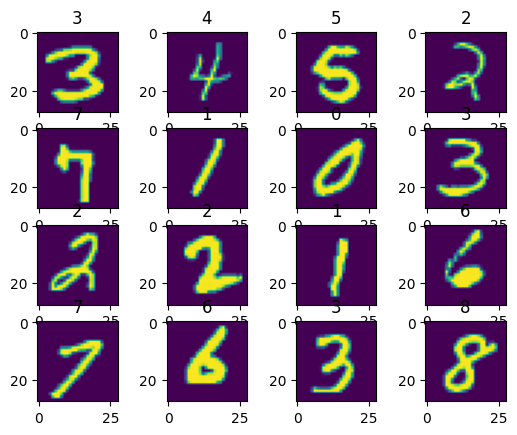

In [3]:
plt.figure()

for i in range(16):
    
    index = np.random.randint(0, x_train.shape[0] - 1)
    plt.subplot(4,4, i+1)
    plt.title(str(y_train[index]))
    plt.imshow(x_train[index])

plt.show()

Using CNN algorithm  

In [4]:
model = tf.keras.Sequential(
    [
        # Experiment on these layers to see how diffrently it trains and what 
        #model is better
        
        Input(shape=(28, 28, 1)),                                                # this is actualy 4D. 1 layer of no. of batches is hidden
        
        Conv2D(32, (3, 3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        Conv2D(32, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        Conv2D(32, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(512, activation='relu'),
        Dense(32, activation='softmax')
    ]
)

In [5]:
x_train = x_train.astype('float') / 255                                          #0 and 255 are corresponting to black and white respectively
x_test = x_test.astype('float') / 255

x_train = np.expand_dims(x_train, axis=-1)                                       #adding another dimension at the end to make it work with Conv2D which expects a 4D tensor
x_test = np.expand_dims(x_test, axis=-1)

Choosing optimizer

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')            #refer classes of optimezer and other things

Model Training with 5 epochs and 50 batch size

In [7]:
# Model training
model.fit(x_train, y_train, batch_size=50, epochs=5, validation_split=0.2)    

Epoch 1/5
960/960 [==============================] - 199s 145ms/step - loss: 0.1930 - accuracy: 0.9458 - val_loss: 0.0729 - val_accuracy: 0.9787
Epoch 2/5
960/960 [==============================] - 128s 134ms/step - loss: 0.0672 - accuracy: 0.9781 - val_loss: 0.0621 - val_accuracy: 0.9804
Epoch 3/5
960/960 [==============================] - 126s 132ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0488 - val_accuracy: 0.9852
Epoch 4/5
960/960 [==============================] - 97s 101ms/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.0510 - val_accuracy: 0.9843
Epoch 5/5
960/960 [==============================] - 76s 79ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0574 - val_accuracy: 0.9837


Evaluation on test set

In [8]:
model.evaluate(x_test, y_test, batch_size=50)

200/200 [==============================] - 6s 30ms/step - loss: 0.0583 - accuracy: 0.9836


[0.05832415074110031, 0.9836000204086304]

This combination of parameters has the highest accuracy among all 3 combinations we have tested for adam optimizer.
It is certain that we can marginally improve the accuracy further by using more epochs, layers, increased batch size. This might result in slight improvement in accuracy but will significantly improve training time.